In [1]:
%matplotlib inline 
import matplotlib.pylab
import numpy as np
import pandas as pd

In [ ]:
# Window functions are like aggregation functions
# You can use them in conjunction with .resample() which will soon be a deferred operation

In [2]:
df = pd.DataFrame(np.random.randn(600, 3), index = pd.date_range('7/1/2016', freq = 'S', periods = 600), columns = ['A', 'B', 'C'])

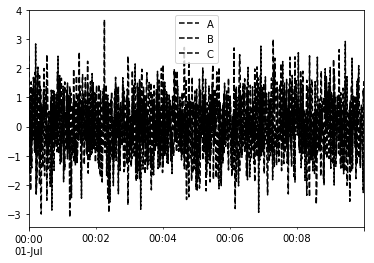

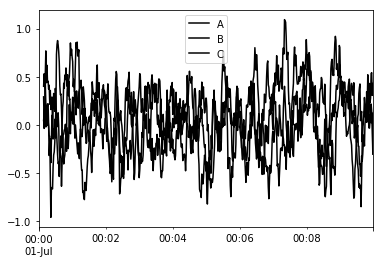

In [3]:
#pd.rolling_mean(df, window = 2)[1:10] # in future versions you want to resample separately
r = df.rolling(window = 10)
#r.agg, r.apply, r.count, r.exclusions, r.max, r.median, r.name, r.quantile, r.kurt, r.cov, r.corr, r.aggregate, r.std, r.skew, r.sum, r.var
df.plot(style = 'k--')
r.mean().plot(style = 'k')

In [5]:
#exponentially weighted
pd.ewma(df, span = 15, min_periods = 2)[1:10]

C:\Users\anhem44\AppData\Local\Continuum\Anaconda3\lib\site-packages\ipykernel\__main__.py:2: FutureWarning: pd.ewm_mean is deprecated for DataFrame and will be removed in a future version, replace with 
	DataFrame.ewm(span=15,min_periods=2,adjust=True,ignore_na=False).mean()
  from ipykernel import kernelapp as app


,A,B,C
2016-07-01 00:00:01,0.453050,-1.270450,1.033666
2016-07-01 00:00:02,0.198704,-0.653801,0.994740
2016-07-01 00:00:03,-0.526192,-0.433286,0.690914
2016-07-01 00:00:04,0.003829,-0.667387,0.413892
2016-07-01 00:00:05,-0.011180,-0.427771,-0.004172
2016-07-01 00:00:06,0.195212,-0.072349,0.124511
2016-07-01 00:00:07,0.190404,-0.102545,0.014249
2016-07-01 00:00:08,0.458815,0.145472,0.141069
2016-07-01 00:00:09,0.607364,0.310482,0.232557


In [6]:
# can also easily plot a rolling average per column
df = pd.DataFrame(np.random.randn(1000, 4), index = pd.date_range('6/6/16', periods = 1000), columns = ['A', 'B', 'C', 'D'])

In [7]:
df.head()

,A,B,C,D
2016-06-06,0.862921,-0.846266,-0.216719,-0.157428
2016-06-07,1.192615,-1.006272,1.426727,-0.261195
2016-06-08,0.212434,-0.709850,0.362253,-1.155604
2016-06-09,1.072494,0.040124,0.658525,0.004859
2016-06-10,0.750691,-0.071144,0.767575,-0.352677


array([<matplotlib.axes._subplots.AxesSubplot object at 0x0000000008C74588>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x0000000009C3A128>], dtype=object)

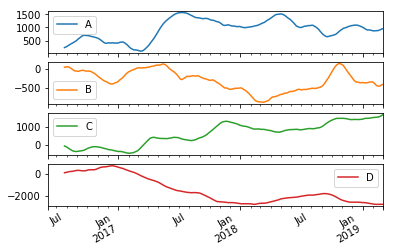

In [8]:
df = df.cumsum()
df.rolling(window = 50).sum().plot(subplots=True)

In [9]:
# What about a custom function?
df.rolling(window = 10).apply(lambda x: np.fabs(x - x.mean()).mean())

,A,B,C,D
2016-06-06,NaN,NaN,NaN,NaN
2016-06-07,NaN,NaN,NaN,NaN
2016-06-08,NaN,NaN,NaN,NaN
2016-06-09,NaN,NaN,NaN,NaN
2016-06-10,NaN,NaN,NaN,NaN
2016-06-11,NaN,NaN,NaN,NaN
2016-06-12,NaN,NaN,NaN,NaN
2016-06-13,NaN,NaN,NaN,NaN
2016-06-14,NaN,NaN,NaN,NaN
2016-06-15,0.912553,0.862576,1.633458,1.188648


In [10]:
# Expanding windows
# Yields the value of the statistic with all the data available up to that point in time
df.expanding(min_periods = 1).mean()[1:5]

,A,B,C,D
2016-06-07,1.459229,-1.349402,0.496645,-0.288026
2016-06-08,1.728809,-1.753731,0.855184,-0.716760
2016-06-09,2.131723,-1.945864,1.199085,-0.929912
2016-06-10,2.523609,-2.075373,1.558940,-1.128339


In [ ]:
# Will an expanding window provide a more or less stable statistic than a rolling statistic? 
# When might one vs. the other be appropriate?

# it will provide a more stable statistic since it will reduce variability swings
# it is more appropriate in situations that the past value is predictive of a future value

In [ ]:
# EWMA
# Why use EWMA?

# use EWMA when you want a Exponentially Weighted Moving Average applied to your rolling window

In [ ]:
# Go do it!
# pandas.pydata.org/pandas-docs/stable/computation.html#stats-aggregate

In [13]:
# Come up with a series that shows how EWMA and Rolling can importantly differ even with the same window setting